# **Business Questions**

# **Exploratory Data Analysis**

In [1]:
# import packages for data cleaning and processing  
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as scs

# import visualization modules
import seaborn as sns
import matplotlib.pyplot as plt

# set display options for Pandas dataframes
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.feature_selection import RFECV
import pickle

In [3]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [4]:
# Read CSV file into notebook
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [5]:
df.shape

(17290, 21)

In [6]:
# Display first 5 rows of dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [7]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028
17289,6703100135,20150116T000000,348000.0,3,1.50,1330,6768,1.0,0,0,4,7,1330,0,1952,0,98155,47.7366,-122.319,1320,6910


In [8]:
# Get descriptive analytics of dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


**Initial Observations:**

- waterfront is a binary discrete variable
- sqft_above + sqft_basement = sqft_living
- sqft_basement and yr_renovated have many null values, potentially express them as binary variables
- categorical variables:  floors, view, grade, zipcode, bathrooms, bedrooms, condition
- continuous variables: price, sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, lat, long, sqft_living15, sqft_lot15

In [ ]:
# Look for any column types that need conversion
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## **Initial Data Cleaning**

In [9]:
# Check for the unique number of non-null values in 'id' subset
df['id'].nunique()


17176

In [10]:
# Drop duplicates from 'id' column 
df = df.drop_duplicates(subset='id')

In [11]:
# Check for any null values in the dataset
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
# Put features into categorical and continuous subsets
feat_cat = df[['view', 'condition', 'grade', 'waterfront', 'floors', 'bedrooms', 'bathrooms', 'zipcode']]
feat_con = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'lat', 'long']]

In [13]:
# Get indices of the subsetted columns
col_con = feat_con.columns
col_cat = feat_cat.columns

## **Continuous variables**

In [1]:
# Display distribution plots of continuous
con_1 = pd.melt(df, value_vars = col_con)
g = sns.FacetGrid(con_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.distplot, 'value', color='r')
g.set_xticklabels(rotation=45)
plt.savefig('df_distplot.jpg')

NameError: name 'pd' is not defined

**Observations:**

- sqft_living, sqft_basement, sqft_living15 are skewed to the right

In [2]:
# Scatterplots of continuous variables
con_2 = pd.melt(df, id_vars='price', value_vars=col_con)
g = sns.FacetGrid(con_2, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.regplot, 'value', 'price', color='darkorange')
g.set_xticklabels(rotation=45)
plt.savefig('df_scatter.png')

NameError: name 'pd' is not defined

### Correlation and Colinearity

In [3]:
# Correlation Matrix of continuous variables
feat_cont = df[['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated', 'lat', 'long']]
corr_matrix = feat_cont.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linecolor='black', linewidths=1.0, xticklabels=True, yticklabels=True)
plt.show()


NameError: name 'df' is not defined

**Observations:**
- strong correlation between price and sqft_living, sqft_above, sqft_living15
- sqft_living, sqft_above, sqft_basement must be related since sqft_above + sqft_basement = sqft_living
- perhaps colinearity with sqrt_living and sqft_above
- stronger correlation with latitude than longitude
- little correlation with yr_renovated, yr_built, sqft_basement, sqft_lot, sqft_lot15

## **Categorical Variables**

In [4]:
# Display bar graphs of categorical variables to see distribution of data
cat_1 = pd.melt(df, value_vars=col_cat)
g = sns.FacetGrid(cat_1, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.countplot, 'value', color='g')
g.set_xticklabels(rotation=90)

NameError: name 'pd' is not defined

In [5]:
# Create scatterplots for categorical variables to observe any relationships
cat_2 = pd.melt(df,id_vars='price', value_vars=col_cat)
g = sns.FacetGrid(cat_2, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.regplot, 'value', 'price', color='dodgerblue')
g.set_xticklabels(rotation=90)

NameError: name 'pd' is not defined

In [6]:
# Display boxplots of categorical variables to observe any trends in the mean values of each category
cat_3 = pd.melt(df, id_vars='price', value_vars=col_cat)
g = sns.FacetGrid(cat_3, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.boxplot, 'value', 'price', color='mediumslateblue')
g.set_xticklabels(rotation=90)

NameError: name 'pd' is not defined

**Obseervations:**

- 33 bedrooms is an outlier, potentially replace with 3 bedrooms
- 11 bedrooms may or may not be inputted incorrectly
- strong exponential relationship in the mean values for number of bathrooms and grade
- little correlation with mean views, perhaps express as binary variable
- potentially replace outliers with the mean for grade and bathrooms

## **Data Cleaning**

In [20]:
# Convert 'date' column to datetime format, rename to 'sale_date', and drop original column
df['sale_date'] = [x[:8] for x in df.date]
df.sale_date = df.sale_date.apply(lambda x: datetime.strptime(x, '%Y%m%d'))
df.drop(columns='date', inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014-10-06
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014-08-21
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014-08-15
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015-03-31
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014-07-14


In [21]:
# Drop 'id' column and check dataframe
df.drop(['id'], inplace=True, axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,2014-10-06
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,2014-08-21
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,2014-08-15
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,2015-03-31
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,2014-07-14


In [22]:
# Replace anomalous bedroom values and check values in column
df.replace({'bedrooms': {33: 3}}, inplace=True)
df.replace({'bedrooms': {11: 1}}, inplace=True)
df.bedrooms.value_counts()

3     7804
4     5470
2     2186
5     1271
6      224
1      161
7       30
0       12
8       10
9        5
10       3
Name: bedrooms, dtype: int64

In [28]:
df[df.grade==11].sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
6903,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014-06-11
3903,3850000.0,4,4.25,5770,21300,2.0,1,4,4,11,5770,0,1980,0,98040,47.5850,-122.222,4620,22748,2014-11-14
260,3650000.0,6,4.75,5480,19401,1.5,1,4,5,11,3910,1570,1936,0,98105,47.6515,-122.277,3510,15810,2015-04-21
1020,3640900.0,4,3.25,4830,22257,2.0,1,4,4,11,4830,0,1990,0,98039,47.6409,-122.241,3820,25582,2014-09-11
10286,3418800.0,5,5.00,5450,20412,2.0,0,0,3,11,5450,0,2014,0,98039,47.6209,-122.237,3160,17825,2014-10-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8344,635000.0,5,3.50,4150,13232,2.0,0,0,3,11,4150,0,2006,0,98003,47.3417,-122.182,3840,15121,2015-02-06
13984,633000.0,5,2.75,3630,30570,2.0,0,0,3,11,3630,0,2000,0,98058,47.4243,-122.097,3620,41965,2014-12-19
2905,575000.0,4,2.50,4620,20793,2.0,0,0,4,11,4620,0,1991,0,98023,47.2929,-122.342,3640,20793,2014-06-24
5668,556000.0,5,2.50,3840,16905,2.0,0,0,3,11,3840,0,1991,0,98023,47.2996,-122.342,3270,12133,2014-05-23


In [29]:
df[df.bathrooms==4.5].sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_date
6903,7062500.0,5,4.5,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,2014-06-11
7823,3567000.0,5,4.5,4850,10584,2.0,1,4,3,10,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270,2015-01-07
5293,3200000.0,7,4.5,6210,8856,2.5,0,2,5,11,4760,1450,1910,0,98109,47.6307,-122.354,2940,5400,2014-05-07
16000,2945000.0,5,4.5,4340,5722,3.0,0,4,3,10,4340,0,2010,0,98107,47.6715,-122.406,1770,5250,2015-03-04
3181,2600000.0,4,4.5,5270,12195,2.0,1,4,3,11,3400,1870,1979,0,98027,47.5696,-122.090,3390,9905,2014-12-16
1468,2500000.0,4,4.5,4300,19844,2.0,0,0,3,11,4300,0,1985,1999,98039,47.6218,-122.237,3070,19845,2014-10-09
6135,2450000.0,4,4.5,5030,11023,2.0,0,2,3,11,3250,1780,2008,0,98040,47.5722,-122.236,3640,11490,2014-05-13
3082,2400000.0,6,4.5,5480,10800,2.0,0,3,4,9,4430,1050,1999,0,98119,47.6307,-122.367,2970,7200,2014-06-20
5656,2187730.0,4,4.5,4240,13162,2.0,0,0,3,10,4240,0,2004,0,98039,47.6193,-122.229,3010,12163,2014-08-12
17134,2005000.0,6,4.5,3810,28176,1.0,0,4,5,10,3810,0,1969,0,98177,47.7612,-122.381,3810,26400,2014-06-04


## **Feature Engineering**

In [30]:
# Create new feature to incorporate built and renovation year
df['sale_age'] = df.sale_date.dt.year - df[['yr_built', 'yr_renovated']].max(axis=1)
# Reset display options set in the beginning
pd.set_option('display.max_rows', 20)
# Look for anomalous values
df.sale_age.value_counts(ascending=False)

 0      418
 9      385
 11     374
 10     370
 8      369
       ... 
 112     21
 115     17
 81      15
 80      12
-1       10
Name: sale_age, Length: 117, dtype: int64

In [31]:
# Replace anomalous values
df.replace({'sale_age': {-1: 0}}, inplace=True)
df.sale_age.value_counts()

0      428
9      385
11     374
10     370
8      369
      ... 
113     23
112     21
115     17
81      15
80      12
Name: sale_age, Length: 116, dtype: int64

In [32]:
# Create binary variable for whether there has been a renovation, has a bathroom, and has been viewed
df['renovated'] = df.yr_renovated.apply(lambda x: x if x==0 else 1)
df['basement'] = df.sqft_basement.apply(lambda x: x if x==0 else 1)
df['viewed'] = df.view.apply(lambda x: x if x==0 else 1)
# Drop original columms as well as the sale_date columns since it is in datetime format
df.drop(['yr_built', 'yr_renovated', 'sale_date', 'sqft_basement', 'view'], inplace=True, axis=1)

In [33]:
# Check for any
print(df.basement.value_counts())
print(df.viewed.value_counts())
print(df.renovated.value_counts())

0    10414
1     6762
Name: basement, dtype: int64
0    15462
1     1714
Name: viewed, dtype: int64
0    16452
1      724
Name: renovated, dtype: int64


In [34]:
# Double-check for null values
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sale_age         0
renovated        0
basement         0
viewed           0
dtype: int64

### **Creating Dummy Variables for Categoricals**


In [35]:
# Get index of the columns
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'sale_age', 'renovated',
       'basement', 'viewed'],
      dtype='object')

In [36]:
# Recreate categorical and continuous subsets of features after feature engineering
feat_con = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'sale_age']]
feat_cat = df[['bedrooms', 'bathrooms', 'waterfront', 'floors', 'viewed', 'condition', 'grade', 'renovated', 'basement']]
index_cat = feat_cat.columns

In [7]:
sns.regplot('sale_age', 'price', df)

NameError: name 'sns' is not defined

In [8]:
cat_4 = pd.melt(df, id_vars='price', value_vars=index_cat)
g = sns.FacetGrid(cat_4, col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g = g.map(sns.boxplot, 'value', 'price', color='mediumslateblue')
g.set_xticklabels(rotation=90)

NameError: name 'pd' is not defined

In [9]:
# Set categorical features as category type
df.bedrooms = df.bedrooms.astype('category')
df.bathrooms = df.bathrooms.astype('category')
df.floors = df.floors.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')
df.renovated = df.renovated.astype('category')
df.basement = df.basement.astype('category')
df.viewed = df.viewed.astype('category')

# Check datatype
df.bedrooms.dtypes

NameError: name 'df' is not defined

In [40]:
# Grab indices of columns for creating dummy variables and set dataframe to dum
index_dum = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']].columns
df_dum = pd.get_dummies(data=df, columns=index_dum, drop_first=True, prefix=['bdr', 'bth', 'flr', 'cnd', 'grd'])
df_dum.head()

,price,sqft_living,sqft_lot,waterfront,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,sale_age,renovated,basement,viewed,bdr_1,bdr_2,bdr_3,bdr_4,bdr_5,bdr_6,bdr_7,bdr_8,bdr_9,bdr_10,bth_0.5,bth_0.75,bth_1.0,bth_1.25,bth_1.5,bth_1.75,bth_2.0,bth_2.25,bth_2.5,bth_2.75,bth_3.0,bth_3.25,bth_3.5,bth_3.75,bth_4.0,bth_4.25,bth_4.5,bth_4.75,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13
0,365000.0,2070,8893,0,2070,98058,47.4388,-122.162,2390,7700,28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,865000.0,2900,6730,0,1830,98115,47.6784,-122.285,2370,6283,37,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1038000.0,3770,10893,0,3770,98006,47.5646,-122.129,3710,9685,17,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1490000.0,4560,14608,0,4560,98034,47.6995,-122.228,4050,14226,25,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,711000.0,2550,5376,0,2550,98052,47.6647,-122.083,2250,4050,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


### **Polynomial and Interaction Features**

In [41]:
# Get dataframe of columns to get polynomial and interaction features
df_features = df_dum.drop('price', axis=1)
# Get target series
target = df_dum['price']
df_features

,sqft_living,sqft_lot,waterfront,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,sale_age,renovated,basement,viewed,bdr_1,bdr_2,bdr_3,bdr_4,bdr_5,bdr_6,bdr_7,bdr_8,bdr_9,bdr_10,bth_0.5,bth_0.75,bth_1.0,bth_1.25,bth_1.5,bth_1.75,bth_2.0,bth_2.25,bth_2.5,bth_2.75,bth_3.0,bth_3.25,bth_3.5,bth_3.75,bth_4.0,bth_4.25,bth_4.5,bth_4.75,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13
0,2070,8893,0,2070,98058,47.4388,-122.162,2390,7700,28,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,2900,6730,0,1830,98115,47.6784,-122.285,2370,6283,37,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3770,10893,0,3770,98006,47.5646,-122.129,3710,9685,17,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4560,14608,0,4560,98034,47.6995,-122.228,4050,14226,25,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2550,5376,0,2550,98052,47.6647,-122.083,2250,4050,10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,3240,9960,0,2020,98008,47.5858,-122.112,2730,10400,57,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
17286,1300,4000,0,1300,98105,47.6687,-122.288,1350,4013,66,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
17287,1050,9876,0,1050,98028,47.7635,-122.262,1760,9403,61,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
17288,1900,43186,0,1300,98038,47.4199,-121.990,2080,108028,43,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [42]:
# Use SKlearn to create binomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_features)
poly_data

array([[ 2070.,  8893.,     0., ...,     0.,     0.,     0.],
       [ 2900.,  6730.,     0., ...,     0.,     0.,     0.],
       [ 3770., 10893.,     0., ...,     0.,     0.,     0.],
       ...,
       [ 1050.,  9876.,     0., ...,     0.,     0.,     0.],
       [ 1900., 43186.,     0., ...,     0.,     0.,     0.],
       [ 1330.,  6768.,     0., ...,     0.,     0.,     0.]])

In [43]:
# Create new dataframe with interaction and polynomial features
poly_columns = poly.get_feature_names(df_features.columns)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()

,sqft_living,sqft_lot,waterfront,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,sale_age,renovated,basement,viewed,bdr_1,bdr_2,bdr_3,bdr_4,bdr_5,bdr_6,bdr_7,bdr_8,bdr_9,bdr_10,bth_0.5,bth_0.75,bth_1.0,bth_1.25,bth_1.5,bth_1.75,bth_2.0,bth_2.25,bth_2.5,bth_2.75,bth_3.0,bth_3.25,bth_3.5,bth_3.75,bth_4.0,bth_4.25,bth_4.5,bth_4.75,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,sqft_living^2,sqft_living sqft_lot,sqft_living waterfront,sqft_living sqft_above,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living sale_age,sqft_living renovated,sqft_living basement,sqft_living viewed,sqft_living bdr_1,sqft_living bdr_2,sqft_living bdr_3,sqft_living bdr_4,sqft_living bdr_5,sqft_living bdr_6,sqft_living bdr_7,sqft_living bdr_8,sqft_living bdr_9,sqft_living bdr_10,sqft_living bth_0.5,sqft_living bth_0.75,sqft_living bth_1.0,sqft_living bth_1.25,sqft_living bth_1.5,...,cnd_3 grd_5,cnd_3 grd_6,cnd_3 grd_7,cnd_3 grd_8,cnd_3 grd_9,cnd_3 grd_10,cnd_3 grd_11,cnd_3 grd_12,cnd_3 grd_13,cnd_4^2,cnd_4 cnd_5,cnd_4 grd_3,cnd_4 grd_4,cnd_4 grd_5,cnd_4 grd_6,cnd_4 grd_7,cnd_4 grd_8,cnd_4 grd_9,cnd_4 grd_10,cnd_4 grd_11,cnd_4 grd_12,cnd_4 grd_13,cnd_5^2,cnd_5 grd_3,cnd_5 grd_4,cnd_5 grd_5,cnd_5 grd_6,cnd_5 grd_7,cnd_5 grd_8,cnd_5 grd_9,cnd_5 grd_10,cnd_5 grd_11,cnd_5 grd_12,cnd_5 grd_13,grd_3^2,grd_3 grd_4,grd_3 grd_5,grd_3 grd_6,grd_3 grd_7,grd_3 grd_8,grd_3 grd_9,grd_3 grd_10,grd_3 grd_11,grd_3 grd_12,grd_3 grd_13,grd_4^2,grd_4 grd_5,grd_4 grd_6,grd_4 grd_7,grd_4 grd_8,grd_4 grd_9,grd_4 grd_10,grd_4 grd_11,grd_4 grd_12,grd_4 grd_13,grd_5^2,grd_5 grd_6,grd_5 grd_7,grd_5 grd_8,grd_5 grd_9,grd_5 grd_10,grd_5 grd_11,grd_5 grd_12,grd_5 grd_13,grd_6^2,grd_6 grd_7,grd_6 grd_8,grd_6 grd_9,grd_6 grd_10,grd_6 grd_11,grd_6 grd_12,grd_6 grd_13,grd_7^2,grd_7 grd_8,grd_7 grd_9,grd_7 grd_10,grd_7 grd_11,grd_7 grd_12,grd_7 grd_13,grd_8^2,grd_8 grd_9,grd_8 grd_10,grd_8 grd_11,grd_8 grd_12,grd_8 grd_13,grd_9^2,grd_9 grd_10,grd_9 grd_11,grd_9 grd_12,grd_9 grd_13,grd_10^2,grd_10 grd_11,grd_10 grd_12,grd_10 grd_13,grd_11^2,grd_11 grd_12,grd_11 grd_13,grd_12^2,grd_12 grd_13,grd_13^2
0,2070.0,8893.0,0.0,2070.0,98058.0,47.4388,-122.162,2390.0,7700.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4284900.0,18408510.0,0.0,4284900.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,57960.0,0.0,0.0,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2900.0,6730.0,0.0,1830.0,98115.0,47.6784,-122.285,2370.0,6283.0,37.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8410000.0,19517000.0,0.0,5307000.0,284533500.0,138267.360,-354626.50,6873000.0,18220700.0,107300.0,0.0,2900.0,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [44]:
# Display difference between original and new Dataframe shapes
print(df_features.shape)
df_poly.shape

(17176, 72)


(17176, 2700)

In [45]:
# Use scikit-learn to fit and assess new model

# instantiate a linear regression object
lm_2 = LinearRegression()

# fit the linear regression to the data
lm_2 = lm_2.fit(df_poly, target)

# access output
print(lm_2.intercept_)
print(lm_2.coef_)
print("R^2: ", lm_2.score(df_poly, target))

35189591762.97262
[ 3.16889156e+06 -2.80496812e+04  5.49897406e+07 ... -2.09905003e+08
  0.00000000e+00  1.62765027e+00]
R^2:  0.8205562569101579


## **Train-Test Split**

### Identify features and target variable

In [46]:
df_poly.columns

Index(['sqft_living', 'sqft_lot', 'waterfront', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'sale_age',
       ...
       'grd_10^2', 'grd_10 grd_11', 'grd_10 grd_12', 'grd_10 grd_13',
       'grd_11^2', 'grd_11 grd_12', 'grd_11 grd_13', 'grd_12^2',
       'grd_12 grd_13', 'grd_13^2'],
      dtype='object', length=2700)

In [47]:
features = df_poly
target = df_dum['price']

In [48]:
features

,sqft_living,sqft_lot,waterfront,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,sale_age,renovated,basement,viewed,bdr_1,bdr_2,bdr_3,bdr_4,bdr_5,bdr_6,bdr_7,bdr_8,bdr_9,bdr_10,bth_0.5,bth_0.75,bth_1.0,bth_1.25,bth_1.5,bth_1.75,bth_2.0,bth_2.25,bth_2.5,bth_2.75,bth_3.0,bth_3.25,bth_3.5,bth_3.75,bth_4.0,bth_4.25,bth_4.5,bth_4.75,bth_5.0,bth_5.25,bth_5.5,bth_5.75,bth_6.0,bth_6.25,bth_6.5,bth_6.75,bth_7.5,bth_7.75,bth_8.0,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cnd_2,cnd_3,cnd_4,cnd_5,grd_3,grd_4,grd_5,grd_6,grd_7,grd_8,grd_9,grd_10,grd_11,grd_12,grd_13,sqft_living^2,sqft_living sqft_lot,sqft_living waterfront,sqft_living sqft_above,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living sqft_living15,sqft_living sqft_lot15,sqft_living sale_age,sqft_living renovated,sqft_living basement,sqft_living viewed,sqft_living bdr_1,sqft_living bdr_2,sqft_living bdr_3,sqft_living bdr_4,sqft_living bdr_5,sqft_living bdr_6,sqft_living bdr_7,sqft_living bdr_8,sqft_living bdr_9,sqft_living bdr_10,sqft_living bth_0.5,sqft_living bth_0.75,sqft_living bth_1.0,sqft_living bth_1.25,sqft_living bth_1.5,...,cnd_3 grd_5,cnd_3 grd_6,cnd_3 grd_7,cnd_3 grd_8,cnd_3 grd_9,cnd_3 grd_10,cnd_3 grd_11,cnd_3 grd_12,cnd_3 grd_13,cnd_4^2,cnd_4 cnd_5,cnd_4 grd_3,cnd_4 grd_4,cnd_4 grd_5,cnd_4 grd_6,cnd_4 grd_7,cnd_4 grd_8,cnd_4 grd_9,cnd_4 grd_10,cnd_4 grd_11,cnd_4 grd_12,cnd_4 grd_13,cnd_5^2,cnd_5 grd_3,cnd_5 grd_4,cnd_5 grd_5,cnd_5 grd_6,cnd_5 grd_7,cnd_5 grd_8,cnd_5 grd_9,cnd_5 grd_10,cnd_5 grd_11,cnd_5 grd_12,cnd_5 grd_13,grd_3^2,grd_3 grd_4,grd_3 grd_5,grd_3 grd_6,grd_3 grd_7,grd_3 grd_8,grd_3 grd_9,grd_3 grd_10,grd_3 grd_11,grd_3 grd_12,grd_3 grd_13,grd_4^2,grd_4 grd_5,grd_4 grd_6,grd_4 grd_7,grd_4 grd_8,grd_4 grd_9,grd_4 grd_10,grd_4 grd_11,grd_4 grd_12,grd_4 grd_13,grd_5^2,grd_5 grd_6,grd_5 grd_7,grd_5 grd_8,grd_5 grd_9,grd_5 grd_10,grd_5 grd_11,grd_5 grd_12,grd_5 grd_13,grd_6^2,grd_6 grd_7,grd_6 grd_8,grd_6 grd_9,grd_6 grd_10,grd_6 grd_11,grd_6 grd_12,grd_6 grd_13,grd_7^2,grd_7 grd_8,grd_7 grd_9,grd_7 grd_10,grd_7 grd_11,grd_7 grd_12,grd_7 grd_13,grd_8^2,grd_8 grd_9,grd_8 grd_10,grd_8 grd_11,grd_8 grd_12,grd_8 grd_13,grd_9^2,grd_9 grd_10,grd_9 grd_11,grd_9 grd_12,grd_9 grd_13,grd_10^2,grd_10 grd_11,grd_10 grd_12,grd_10 grd_13,grd_11^2,grd_11 grd_12,grd_11 grd_13,grd_12^2,grd_12 grd_13,grd_13^2
0,2070.0,8893.0,0.0,2070.0,98058.0,47.4388,-122.162,2390.0,7700.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4284900.0,18408510.0,0.0,4284900.0,202980060.0,98198.316,-252875.34,4947300.0,15939000.0,57960.0,0.0,0.0,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2900.0,6730.0,0.0,1830.0,98115.0,47.6784,-122.285,2370.0,6283.0,37.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8410000.0,19517000.0,0.0,5307000.0,284533500.0,138267.360,-354626.50,6873000.0,18220700.0,107300.0,0.0,2900.0,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### Create Train and Test Split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=34, test_size=0.2)
print("Training Set - Features: ", x_train.shape, "Target: ", y_train.shape)
print("Testing Set - Features: ", x_test.shape, "Target: ", y_test.shape)

Training Set - Features:  (13740, 2700) Target:  (13740,)
Testing Set - Features:  (3436, 2700) Target:  (3436,)


In [50]:
lm = linear_model.LinearRegression()
lm = lm.fit(x_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print("R^2 Score: ", lm.score(x_train, y_train))

33670031831.09995
[ 1.18537215e+07 -2.19278192e+04  7.20477868e+07 ...  8.63572918e+06
  0.00000000e+00  7.74360917e-01]
R^2 Score:  0.8773466150085426


### Model Performance

In [51]:
y_train_pred = lm.predict(x_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
price_std = target.std()
print('Mean Absolute Error: ', train_mae)
print('Mean Squared Error: ', train_mse)
print('Root Mean Squared Error: ', train_rmse)
print('Z-Score of Mean Absolute Error: ', train_mae/price_std)
print('Z-Score of Root Mean Squared Error: ', train_rmse/price_std)

Mean Absolute Error:  91114.85608689365
Mean Squared Error:  17381154843.69151
Root Mean Squared Error:  131837.6078503077
Z-Score of Mean Absolute Error:  0.2438349502572931
Z-Score of Root Mean Squared Error:  0.3528142163947773


### Predicting Test Set and *comparing* model performance on training vs. test data

In [52]:
y_pred = lm.predict(x_test)
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Score: ", lm.score(x_test, y_test))
print('Mean Absolute Error: ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: ' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Mean Absolute Error Z: ', test_mae/price_std)
print('Root Mean Squared Error Z: ', test_rmse/price_std)
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Score:  -15388223.577193366
Mean Absolute Error: 28520385.47613443
Mean Squared Error: 2.020255713455701e+18
Root Mean Squared Error: 1421356997.1881452
Mean Absolute Error Z:  76.32418106724525
Root Mean Squared Error Z:  3803.7322078049124
Training:  131837 vs. Testing:  1421356997


### Check assumptions of linear regression

In [53]:
residuals = (y_test - y_pred)

In [10]:
plt.hist(residuals)

NameError: name 'plt' is not defined

In [11]:
sns.residplot(y_pred, y_test, lowess=True, color='g')

NameError: name 'sns' is not defined

### Log Transformation of Target

44907.30113528344
[ 3.24401184e+01 -1.51384012e-01  4.46425780e+01 ... -5.05951542e+00
  0.00000000e+00  1.75409539e-06]


### Check for assumptions of linear regression

In [12]:
residuals = (y_test- y_log_pred)
plt.hist(residuals, bins=30)
sns.residplot(y_log_pred, y_test, lowess=True, color="g")

NameError: name 'y_test' is not defined

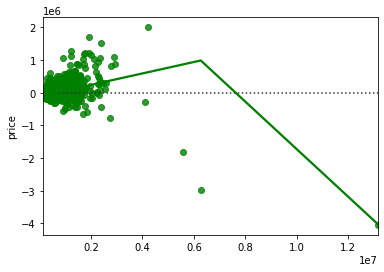

## **Feature Selection (K-best, recursive)**


In [56]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=9, test_size=0.2)

### K-best

In [58]:
x_train.shape

(13740, 2700)

In [59]:
selector = SelectKBest(f_regression, k=20)
selector.fit(x_train, y_train)

SelectKBest(k=20, score_func=<function f_regression at 0x7fb454ad6dc0>)

In [60]:
selected_columns = x_train.columns[selector.get_support()]
removed_columns = x_train.columns[~selector.get_support()]
#X_train = X_train[selected_columns]
#X_test = X_test[selected_columns]

In [61]:
list(selected_columns)

['sqft_living',
 'sqft_above',
 'sqft_living15',
 'sqft_living^2',
 'sqft_living sqft_above',
 'sqft_living zipcode',
 'sqft_living lat',
 'sqft_living long',
 'sqft_living sqft_living15',
 'sqft_living viewed',
 'sqft_above^2',
 'sqft_above zipcode',
 'sqft_above lat',
 'sqft_above long',
 'sqft_above sqft_living15',
 'sqft_above viewed',
 'zipcode sqft_living15',
 'lat sqft_living15',
 'long sqft_living15',
 'sqft_living15^2']

In [62]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#fit the linear regression to the data
lm_kbest.fit(x_train[selected_columns], y_train)
y_train_kbest = lm_kbest.predict(x_train[selected_columns])
trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))
print('Training Root Mean Squared Error:' , trainK_rmse)

y_kbest = lm_kbest.predict(x_test[selected_columns])
testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))
print('Testing Root Mean Squared Error:' , testK_rmse)

Training Root Mean Squared Error: 208007.9199366878
Testing Root Mean Squared Error: 203488.65947786396


In [63]:
list(zip(selected_columns, lm_kbest.coef_))

[('sqft_living', -33670.62943275622),
 ('sqft_above', 24136.538457455834),
 ('sqft_living15', -7137.214106763799),
 ('sqft_living^2', -0.02541728815525352),
 ('sqft_living sqft_above', 0.08602490301990362),
 ('sqft_living zipcode', -0.7425490608091445),
 ('sqft_living lat', 275.0378785803648),
 ('sqft_living long', -763.5665165870732),
 ('sqft_living sqft_living15', 0.09103206532234963),
 ('sqft_living viewed', -5.337529635037424),
 ('sqft_above^2', -0.011931067811917741),
 ('sqft_above zipcode', 0.0197438556629099),
 ('sqft_above lat', 77.45229547483142),
 ('sqft_above long', 242.2919172623073),
 ('sqft_above sqft_living15', -0.12394871670627193),
 ('sqft_above viewed', 92.51736544217373),
 ('zipcode sqft_living15', 0.4823309388349777),
 ('lat sqft_living15', 12.947237606190217),
 ('long sqft_living15', 333.32700171255834),
 ('sqft_living15^2', 0.020563398443346766)]

In [64]:
print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n')

Original:  1421356997.1881452 
 KBest:    203488.65947786396 



In [65]:
selected_columns

Index(['sqft_living', 'sqft_above', 'sqft_living15', 'sqft_living^2',
       'sqft_living sqft_above', 'sqft_living zipcode', 'sqft_living lat',
       'sqft_living long', 'sqft_living sqft_living15', 'sqft_living viewed',
       'sqft_above^2', 'sqft_above zipcode', 'sqft_above lat',
       'sqft_above long', 'sqft_above sqft_living15', 'sqft_above viewed',
       'zipcode sqft_living15', 'lat sqft_living15', 'long sqft_living15',
       'sqft_living15^2'],
      dtype='object')

### Recursive Feature Elimination

In [ ]:
ols = linear_model.LinearRegression()

X_train_8.shape
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Fit recursive feature eliminator 
selector.fit(X_train_8, y_train_8)
selected_rfe = X_train_8.columns[selector.support_]
removed_rfe = X_train_8.columns[~selector.support_]
list(removed_rfe)
len(list(selected_rfe))

#instantiate a linear regression object
lm_rfe = LinearRegression()
#fit the linear regression to the data
lm_rfe = lm_rfe.fit(X_train_8[selected_rfe], y_train_8)
y_rfe = lm_rfe.predict(X_train_8[selected_rfe])
trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train_8, y_rfe))
print('Training Root Mean Squared Error:' , trainRFE_rmse)
y_pred_rfe = lm_rfe.predict(X_test_8[selected_rfe])
testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test_8, y_pred_rfe))
print('Testing Root Mean Squared Error:' , testRFE_rmse)

print('Original: ', test_rmse, '\n',
      "KBest:   ", testK_rmse,'\n',)
      "RFE:     ", testRFE_rmse)

(13740, 2700)

In [ ]:
target_log = np.log(target)
#instantiate a linear regression object
log_model = LinearRegression()

#fit the linear regression to the log of the target variable
log_model.fit(x_train, np.log(y_train))

#access output
print(log_model.intercept_)
print(log_model.coef_)

y_log_train_pred = log_model.predict(x_train)
y_log_train_pred = np.exp(y_log_train_pred)
log_train_mae = metrics.mean_absolute_error(y_train, y_log_train_pred)
log_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_log_train_pred))
print('Mean Absolute Error:', log_train_mae)
print('Root Mean Squared Error:' , log_train_rmse)

y_log_pred = log_model.predict(x_test)
y_log_pred = np.exp(y_log_pred)
test_log_mae = metrics.mean_absolute_error(y_test, y_log_pred)
test_log_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_log_pred))
print('Mean Absolute Error:' + str(test_log_mae))
print('Root Mean Squared Error:' + str(test_log_rmse))
print('Original: ', int(test_rmse), "vs. Logged: ", int(test_log_rmse))

## **Final Model**

In [66]:
scaler = StandardScaler()

#fit and transform the  data
features = pd.DataFrame(data=scaler.fit_transform(features), columns=features.columns)

In [67]:
selector = SelectKBest(f_regression, k=20)

selector.fit(features, target)

SelectKBest(k=20, score_func=<function f_regression at 0x7fb454ad6dc0>)

In [68]:
selected_columns = x_train.columns[selector.get_support()]
removed_columns = x_train.columns[~selector.get_support()]

In [69]:
#instantiate a linear regression object
lm_final = LinearRegression()

#fit the linear regression to the data
lm_final = lm_final.fit(features[selected_columns], target)

In [70]:
lm_final.coef_

array([-2.18251873e+07,  1.44053993e+07, -7.71804589e+06, -2.08984352e+05,
        5.42861482e+05, -6.75644748e+07,  1.33304238e+07, -7.59566327e+07,
        3.16777387e+05, -8.91425252e+02, -1.38036677e+05,  6.19240347e+06,
        1.78143949e+06,  2.22470778e+07, -3.89293764e+05,  6.30234444e+04,
        2.98645380e+07,  2.75519170e+05,  2.23742280e+07,  6.96963076e+04])

## **Pickle**

In [71]:
pickle_out = open("model.pickle","wb")
pickle.dump(lm_final, pickle_out)
pickle_out.close()

In [74]:
pickle_out = open("scaler.pickle", "wb")
pickle.dump(scaler, pickle_out)
pickle_out.close

<function BufferedWriter.close>